In [1]:
from ddf_df_gen import generate_ddf_df
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

from ddf_presched import generate_ddf_scheduled_obs

In [2]:
df = generate_ddf_df()

In [3]:
df

,ddf_name,season,even_odd,u,g,r,i,z,y,season_length,flush_length,g_depth_limit,n_sequences
0,XMM_LSS,0,None,3,0,0,0,0,0,225,2.0,23.5,33
0,XMM_LSS,0,None,0,0,0,0,0,2,225,2.0,23.5,33
0,XMM_LSS,0,even,0,2,0,2,0,0,225,0.5,22.8,56
0,XMM_LSS,0,odd,0,0,2,0,2,0,225,0.5,22.8,56
0,XMM_LSS,10,None,3,0,0,0,0,0,225,2.0,23.5,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,EDFS_a,1,None,30,0,0,0,0,0,225,2.0,23.5,75
0,EDFS_a,1,None,0,0,0,0,0,40,225,2.0,23.5,75
0,EDFS_a,1,even,0,4,0,4,0,0,225,0.5,22.8,200
0,EDFS_a,1,odd,0,0,4,0,4,0,225,0.5,22.8,200


In [4]:
STANDARD_EXP_TIME = 30.0
STANDARD_EXP_TIME_u = 38.0


expt={
        "u": STANDARD_EXP_TIME_u,
        "g": STANDARD_EXP_TIME,
        "r": STANDARD_EXP_TIME,
        "i": STANDARD_EXP_TIME,
        "z": STANDARD_EXP_TIME,
        "y": STANDARD_EXP_TIME,
    }
nsnaps={"u": 1, "g": 1, "r": 1, "i": 1, "z": 1, "y": 1}

In [5]:


obs_array = generate_ddf_scheduled_obs(df, expt=expt, nsnaps=nsnaps)

/Users/yoachim/git_repos/sims_featureScheduler_runs5.0/baseline/ddf_presched.py:392: UserWarning: Asked for 56 ELAISS1 sequences, but only 55 nights. Decreasing sequences.
  warnings.warn(
/Users/yoachim/git_repos/sims_featureScheduler_runs5.0/baseline/ddf_presched.py:392: UserWarning: Asked for 200 COSMOS sequences, but only 123 nights. Decreasing sequences.
  warnings.warn(
/Users/yoachim/git_repos/sims_featureScheduler_runs5.0/baseline/ddf_presched.py:392: UserWarning: Asked for 200 COSMOS sequences, but only 122 nights. Decreasing sequences.
  warnings.warn(
/Users/yoachim/git_repos/sims_featureScheduler_runs5.0/baseline/ddf_presched.py:392: UserWarning: Asked for 200 COSMOS sequences, but only 124 nights. Decreasing sequences.
  warnings.warn(
/Users/yoachim/git_repos/sims_featureScheduler_runs5.0/baseline/ddf_presched.py:392: UserWarning: Asked for 200 XMM_LSS sequences, but only 131 nights. Decreasing sequences.
  warnings.warn(
/Users/yoachim/git_repos/sims_featureScheduler_run

In [6]:
good = np.where((obs_array["scheduler_note"] == "DD:XMM_LSS") & (obs_array["band"] == "u"))[0]

In [7]:
obs_array["mjd"][good]

ScheduledObservationArray([60993.14583298, 60993.14583298, 60993.14583298,
                           ..., 62561.02777597, 62561.02777597,
                           62561.02777597], shape=(2598,))

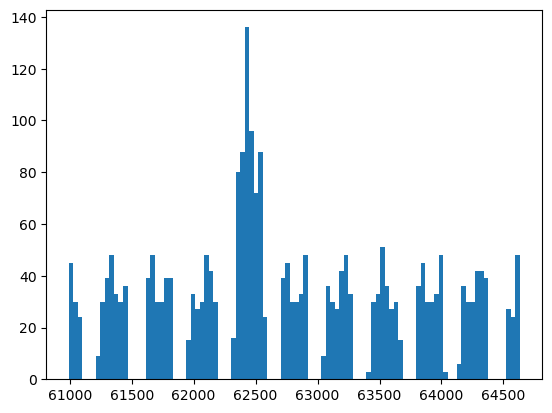

In [8]:
ack_ = plt.hist(obs_array["mjd"][good], bins=100)